In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('book_extracted.csv')

In [3]:
df.head()

,book_id,title,aurthor,category,description,poster-src,published year,num pages
0,36716,زندگی نامرئی ادی لارو,وی. ای. شواب,امتیاز:۳.۸از ۳۶ رأیخواندن نظرات,ستاره‌های خیلی زیادی در آسمان هستند و آن شب خی...,https://img.taaghche.com/frontCover/215165.jpg...,سال انتشار۱۴۰۳,تعداد صفحه‌ها۷۲۰ صفحه
1,47196,رازهای خلاقیت استیو جابز,کارماین گالو,NaN,«استیو جابز» موسس شرکت اپل یکی از موفق‌ترین مب...,https://img.taaghche.com/audioCover/33358.jpg,سال انتشار,تعداد صفحه‌ها۰ صفحه
2,67141,عزاداران بیل,غلامحسین ساعدی,NaN,ساعدی با چوب بدست های ورزیل، بهترین بابای دنیا...,https://img.taaghche.com/frontCover/3124.jpg?w...,سال انتشار۱۳۸۸,تعداد صفحه‌ها۲۰۸ صفحه
3,57259,روحانیت و حوزه,علی صفایی حائری,NaN,کتاب‌ «روحانیت و حوزه» نوشته استاد صفایی از پر...,https://img.taaghche.com/frontCover/45287.jpg,سال انتشار ۱۳۹۰,تعداد صفحه‌ها۲۴۰ صفحه
4,66843,مهمانخانه قاچاقچی ها,کیت میلفرد,امتیاز:۴.۳از ۳۸ رأیخواندن نظرات,خانم پاین دست‌به‌سینه ایستاده بود تا فریاد مای...,https://img.taaghche.com/frontCover/90150.jpg?...,سال انتشار۱۳۹۶,تعداد صفحه‌ها۳۶۸ صفحه


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5705 entries, 0 to 5704
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   book_id         5705 non-null   int64 
 1   title           5705 non-null   object
 2   aurthor         5705 non-null   object
 3   category        2585 non-null   object
 4   description     4246 non-null   object
 5   poster-src      5705 non-null   object
 6   published year  5701 non-null   object
 7   num pages       5628 non-null   object
dtypes: int64(1), object(7)
memory usage: 356.7+ KB


In [9]:
df.isnull().sum()

book_id              0
title                0
aurthor              0
category          3120
description       1459
poster-src           0
published year       4
num pages           77
dtype: int64

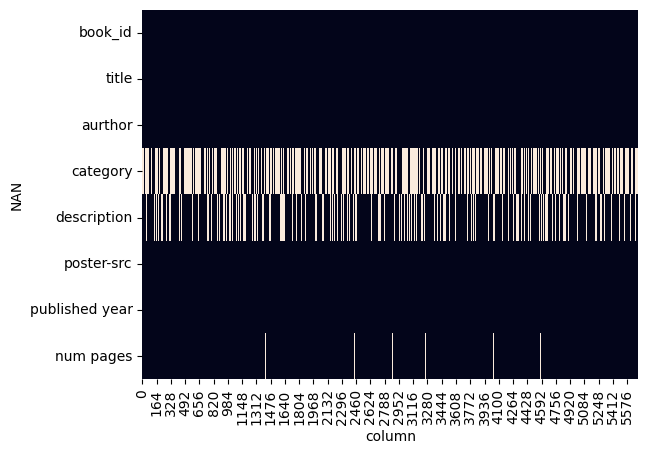

In [11]:
ax = plt.axes()
sns.heatmap(df.isna().transpose(),cbar=False,ax=ax)
plt.xlabel('column')
plt.ylabel('NAN')
plt.show()

In [12]:
df['missing_description'] = np.where(df['description'].isna(),1,0)


In [17]:
book = df[~(df['description'].isna()) &
    ~(df['num pages'].isna()) &
    ~(df['published year'].isna())]

In [18]:
book.isnull().sum()

book_id                   0
title                     0
aurthor                   0
category               2540
description               0
poster-src                0
published year            0
num pages                 0
missing_description       0
dtype: int64

In [19]:
book.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4214 entries, 0 to 5703
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   book_id              4214 non-null   int64 
 1   title                4214 non-null   object
 2   aurthor              4214 non-null   object
 3   category             1674 non-null   object
 4   description          4214 non-null   object
 5   poster-src           4214 non-null   object
 6   published year       4214 non-null   object
 7   num pages            4214 non-null   object
 8   missing_description  4214 non-null   int64 
dtypes: int64(2), object(7)
memory usage: 329.2+ KB


In [20]:
book['num pages']

0       تعداد صفحه‌ها۷۲۰ صفحه
1         تعداد صفحه‌ها۰ صفحه
2       تعداد صفحه‌ها۲۰۸ صفحه
3       تعداد صفحه‌ها۲۴۰ صفحه
4       تعداد صفحه‌ها۳۶۸ صفحه
                ...          
5698     تعداد صفحه‌ها۲۴ صفحه
5699    تعداد صفحه‌ها۵۳۶ صفحه
5700    تعداد صفحه‌ها۲۶۴ صفحه
5701    تعداد صفحه‌ها۵۸۲ صفحه
5703    تعداد صفحه‌ها۳۵۶ صفحه
Name: num pages, Length: 4214, dtype: object

In [21]:
book['num pages'] = book['num pages'].str.extract('(\d+)')

C:\Users\Mahdimtd\AppData\Local\Temp\ipykernel_6764\2295834376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book['num pages'] = book['num pages'].str.extract('(\d+)')


In [22]:
book['num pages']

0       ۷۲۰
1         ۰
2       ۲۰۸
3       ۲۴۰
4       ۳۶۸
       ... 
5698     ۲۴
5699    ۵۳۶
5700    ۲۶۴
5701    ۵۸۲
5703    ۳۵۶
Name: num pages, Length: 4214, dtype: object

In [23]:
book['published year'] = book['published year'].str.extract('(\d+)')

C:\Users\Mahdimtd\AppData\Local\Temp\ipykernel_6764\3770695957.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book['published year'] = book['published year'].str.extract('(\d+)')


In [26]:
book.isnull().sum()

book_id                   0
title                     0
aurthor                   0
category               2540
description               0
poster-src                0
published year          266
num pages                 0
missing_description       0
dtype: int64

In [27]:
book['word_count_desctiption'] = book['description'].str.split().str.len()

C:\Users\Mahdimtd\AppData\Local\Temp\ipykernel_6764\3257594531.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book['word_count_desctiption'] = book['description'].str.split().str.len()


In [28]:
book['word_count_desctiption']

0       14
1       84
2       50
3       72
4       58
        ..
5698    46
5699    60
5700    92
5701    32
5703     8
Name: word_count_desctiption, Length: 4214, dtype: int64

In [29]:
book.loc[book['word_count_desctiption'].between(1,4),'description']

6                     #NAME?
77                    «سلام.
112           فصل سوم: روایت
143     «تقریباً بهتر شده.‌»
230                پیش‌گفتار
                ...         
5515               «چی بگم؟»
5569              فرهاد بود.
5624         -‌ آره، بیا تو.
5664                  #NAME?
5697                  #NAME?
Name: description, Length: 146, dtype: object

In [30]:
book.loc[book['word_count_desctiption'].between(5,14),'description']

0       ستاره‌های خیلی زیادی در آسمان هستند و آن شب خی...
11      این کتاب را به تمام جوانانی که به نبال زندگی ا...
24      «مادربزرگ خوبم» مجموعه‌ای از اشعار کودکانه اخل...
36                     ... همه‌جا آرام... همه‌چیز روشن...
71      جنون مینیمالیسم: آیا تمیزی و سادگی ما را نجات ...
                              ...                        
5666              زان می‌که در شب‌های غم، بارد فروغ صبحدم
5680    شکوفه بدون حرف نگاهش می‌کرد. کلاریس فنجانش را ...
5686    میترا در ذهنم جا گرفته است و دلم هم می‌خواهدش....
5689    «فکر می‌کردم خودت می‌فهمی که استیو را نمی‌خواهم.»
5703          _ «پس که این‌طور... یه جور کامپیوتره، آره؟»
Name: description, Length: 435, dtype: object

In [37]:
book.loc[book['word_count_desctiption'].between(1,10),'description']

6                                                  #NAME?
36                     ... همه‌جا آرام... همه‌چیز روشن...
77                                                 «سلام.
83      آدام لُبُر، نویسنده نیوزویک درباره مارشال گفته...
89                   بخشی از کتاب حرف‌هایی برای امروزی‌ها
                              ...                        
5664                                               #NAME?
5666              زان می‌که در شب‌های غم، بارد فروغ صبحدم
5689    «فکر می‌کردم خودت می‌فهمی که استیو را نمی‌خواهم.»
5697                                               #NAME?
5703          _ «پس که این‌طور... یه جور کامپیوتره، آره؟»
Name: description, Length: 389, dtype: object

In [38]:
book_10_words = book[book['word_count_desctiption'] >=10 ]

In [39]:
book_10_words.shape

(3866, 10)

In [40]:
book_10_words['tagged_description'] = book_10_words[['book_id','description']].astype(str).agg(''.join,axis=1)

C:\Users\Mahdimtd\AppData\Local\Temp\ipykernel_6764\2092211094.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_10_words['tagged_description'] = book_10_words[['book_id','description']].astype(str).agg(''.join,axis=1)


In [41]:
book_10_words

,book_id,title,aurthor,category,description,poster-src,published year,num pages,missing_description,word_count_desctiption,tagged_description
0,36716,زندگی نامرئی ادی لارو,وی. ای. شواب,امتیاز:۳.۸از ۳۶ رأیخواندن نظرات,ستاره‌های خیلی زیادی در آسمان هستند و آن شب خی...,https://img.taaghche.com/frontCover/215165.jpg...,۱۴۰۳,۷۲۰,0,14,36716ستاره‌های خیلی زیادی در آسمان هستند و آن ...
1,47196,رازهای خلاقیت استیو جابز,کارماین گالو,NaN,«استیو جابز» موسس شرکت اپل یکی از موفق‌ترین مب...,https://img.taaghche.com/audioCover/33358.jpg,NaN,۰,0,84,47196«استیو جابز» موسس شرکت اپل یکی از موفق‌تر...
2,67141,عزاداران بیل,غلامحسین ساعدی,NaN,ساعدی با چوب بدست های ورزیل، بهترین بابای دنیا...,https://img.taaghche.com/frontCover/3124.jpg?w...,۱۳۸۸,۲۰۸,0,50,67141ساعدی با چوب بدست های ورزیل، بهترین بابای...
3,57259,روحانیت و حوزه,علی صفایی حائری,NaN,کتاب‌ «روحانیت و حوزه» نوشته استاد صفایی از پر...,https://img.taaghche.com/frontCover/45287.jpg,۱۳۹۰,۲۴۰,0,72,57259کتاب‌ «روحانیت و حوزه» نوشته استاد صفایی ...
4,66843,مهمانخانه قاچاقچی ها,کیت میلفرد,امتیاز:۴.۳از ۳۸ رأیخواندن نظرات,خانم پاین دست‌به‌سینه ایستاده بود تا فریاد مای...,https://img.taaghche.com/frontCover/90150.jpg?...,۱۳۹۶,۳۶۸,0,58,66843خانم پاین دست‌به‌سینه ایستاده بود تا فریا...
...,...,...,...,...,...,...,...,...,...,...,...
5696,69311,کتاب کبریت ایران,مهدی صادقی,NaN,آن چه در این کتاب پیش روی شماست، مروری است بر ...,https://img.taaghche.com/frontCover/42390.jpg,۱۳۹۴,۲۷۲,0,176,69311آن چه در این کتاب پیش روی شماست، مروری اس...
5698,37886,کی بود؟ کی بود؟ آناس دوست بخور منو نه با پوست ...,ناصر کشاورز,NaN,«کی بود؟ کی بود؟ آناس دوست بخور منو نه با پوست...,https://img.taaghche.com/frontCover/11715.jpg,۱۳۹۱,۲۴,0,46,37886«کی بود؟ کی بود؟ آناس دوست بخور منو نه با...
5699,28228,دروغ گویی روی مبل,اروین د. یالوم,امتیاز:۴.۱از ۲۸ رأیخواندن نظرات,در سینما نیز فیلم‌هایی با الهام از آثار اروین ...,https://img.taaghche.com/frontCover/203008.jpg...,۱۴۰۲,۵۳۶,0,60,28228در سینما نیز فیلم‌هایی با الهام از آثار ا...
5700,63091,صداهایی از چرنوبیل,سوتلانا آلکسیویچ,امتیاز:۴.۳از ۲۲۱ رأیخواندن نظرات,آن روز غروب نتوانستم وارد بیمارستان بشوم. سیل ...,https://img.taaghche.com/frontCover/7756.jpg?w...,۱۳۹۴,۲۶۴,0,92,63091آن روز غروب نتوانستم وارد بیمارستان بشوم....


In [44]:
book_10_words.drop(['missing_description','word_count_desctiption','category'],axis=1,inplace=True)

C:\Users\Mahdimtd\AppData\Local\Temp\ipykernel_6764\1151768422.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_10_words.drop(['missing_description','word_count_desctiption','category'],axis=1,inplace=True)


In [45]:
book_10_words

,book_id,title,aurthor,description,poster-src,published year,num pages,tagged_description
0,36716,زندگی نامرئی ادی لارو,وی. ای. شواب,ستاره‌های خیلی زیادی در آسمان هستند و آن شب خی...,https://img.taaghche.com/frontCover/215165.jpg...,۱۴۰۳,۷۲۰,36716ستاره‌های خیلی زیادی در آسمان هستند و آن ...
1,47196,رازهای خلاقیت استیو جابز,کارماین گالو,«استیو جابز» موسس شرکت اپل یکی از موفق‌ترین مب...,https://img.taaghche.com/audioCover/33358.jpg,NaN,۰,47196«استیو جابز» موسس شرکت اپل یکی از موفق‌تر...
2,67141,عزاداران بیل,غلامحسین ساعدی,ساعدی با چوب بدست های ورزیل، بهترین بابای دنیا...,https://img.taaghche.com/frontCover/3124.jpg?w...,۱۳۸۸,۲۰۸,67141ساعدی با چوب بدست های ورزیل، بهترین بابای...
3,57259,روحانیت و حوزه,علی صفایی حائری,کتاب‌ «روحانیت و حوزه» نوشته استاد صفایی از پر...,https://img.taaghche.com/frontCover/45287.jpg,۱۳۹۰,۲۴۰,57259کتاب‌ «روحانیت و حوزه» نوشته استاد صفایی ...
4,66843,مهمانخانه قاچاقچی ها,کیت میلفرد,خانم پاین دست‌به‌سینه ایستاده بود تا فریاد مای...,https://img.taaghche.com/frontCover/90150.jpg?...,۱۳۹۶,۳۶۸,66843خانم پاین دست‌به‌سینه ایستاده بود تا فریا...
...,...,...,...,...,...,...,...,...
5696,69311,کتاب کبریت ایران,مهدی صادقی,آن چه در این کتاب پیش روی شماست، مروری است بر ...,https://img.taaghche.com/frontCover/42390.jpg,۱۳۹۴,۲۷۲,69311آن چه در این کتاب پیش روی شماست، مروری اس...
5698,37886,کی بود؟ کی بود؟ آناس دوست بخور منو نه با پوست ...,ناصر کشاورز,«کی بود؟ کی بود؟ آناس دوست بخور منو نه با پوست...,https://img.taaghche.com/frontCover/11715.jpg,۱۳۹۱,۲۴,37886«کی بود؟ کی بود؟ آناس دوست بخور منو نه با...
5699,28228,دروغ گویی روی مبل,اروین د. یالوم,در سینما نیز فیلم‌هایی با الهام از آثار اروین ...,https://img.taaghche.com/frontCover/203008.jpg...,۱۴۰۲,۵۳۶,28228در سینما نیز فیلم‌هایی با الهام از آثار ا...
5700,63091,صداهایی از چرنوبیل,سوتلانا آلکسیویچ,آن روز غروب نتوانستم وارد بیمارستان بشوم. سیل ...,https://img.taaghche.com/frontCover/7756.jpg?w...,۱۳۹۴,۲۶۴,63091آن روز غروب نتوانستم وارد بیمارستان بشوم....


In [46]:
book_10_words.to_csv('cleaned_data.csv')